# Breast Cancer Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Importing Dataset

In [2]:
candf=pd.read_csv('breast-cancer.csv')
candf.head()
candf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis

In [3]:
candf.shape

(569, 32)

In [4]:
candf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
candf.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
candf.index

RangeIndex(start=0, stop=569, step=1)

In [7]:
#dropping 'id' column since it does not have any use in our analysis
candf=candf.drop('id',axis=1)

In [8]:
candf.shape

(569, 31)

In [9]:
candf.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#Encoding categorical features using an ordinal encoding scheme.
from sklearn.preprocessing import LabelEncoder

In [11]:
LE= LabelEncoder()

In [12]:
#converted diagnosis column
candf['diagnosis_values']=LE.fit_transform(candf['diagnosis'])
candf.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_values
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Graphical Analysis 

### Perimeter_mean vs Radius_mean

<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>

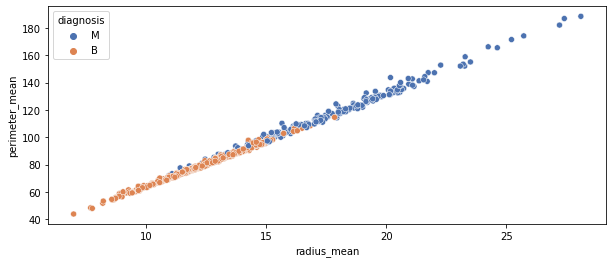

In [13]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=candf,x='radius_mean',y='perimeter_mean',hue='diagnosis',palette='deep')

#### Insights:- 
1) Malignant tumours have higher values of radius_mean and perimeter_mean 
                                    
2) Benign tumours have lower values of radius_mean and perimeter_mean

### Diagnosis_values vs Perimeter_worst

<AxesSubplot:xlabel='diagnosis_values', ylabel='perimeter_worst'>

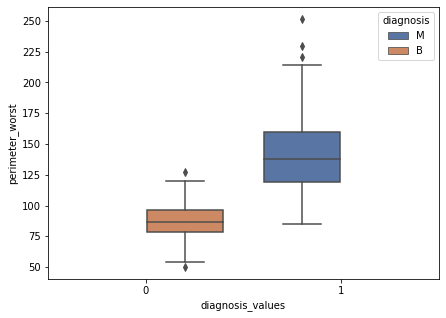

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(data=candf,x='diagnosis_values',y='perimeter_worst',hue='diagnosis',palette='deep')

#### Insights:- 
1) Malignant tumours have higher values of perimeter_worst   
                                    
2) Benign tumours have lower values of perimeter_worst

### Diagnosis_values vs Concave points_mean 

<AxesSubplot:xlabel='diagnosis_values', ylabel='symmetry_se'>

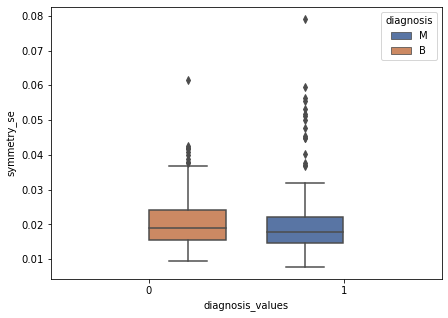

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(data=candf,x='diagnosis_values',y='symmetry_se',hue='diagnosis',palette='deep')

<AxesSubplot:>

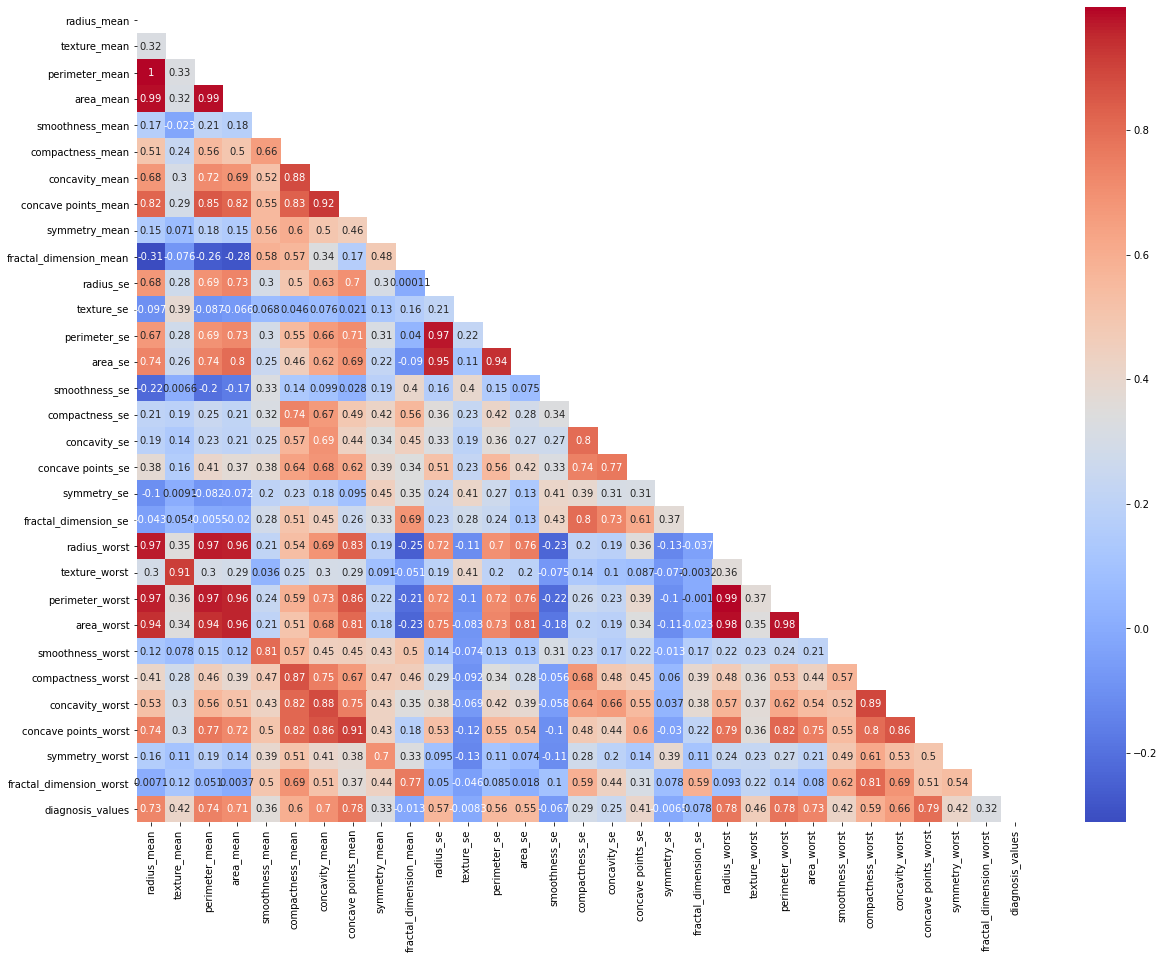

In [16]:
plt.figure(figsize=(20,15))
correl=candf.corr()
matrix = np.triu(correl)
sns.heatmap(correl,annot=True,mask=matrix, cmap='coolwarm')

In [17]:
correl.iloc[0][:]

radius_mean                1.000000
texture_mean               0.323782
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.170581
compactness_mean           0.506124
concavity_mean             0.676764
concave points_mean        0.822529
symmetry_mean              0.147741
fractal_dimension_mean    -0.311631
radius_se                  0.679090
texture_se                -0.097317
perimeter_se               0.674172
area_se                    0.735864
smoothness_se             -0.222600
compactness_se             0.206000
concavity_se               0.194204
concave points_se          0.376169
symmetry_se               -0.104321
fractal_dimension_se      -0.042641
radius_worst               0.969539
texture_worst              0.297008
perimeter_worst            0.965137
area_worst                 0.941082
smoothness_worst           0.119616
compactness_worst          0.413463
concavity_worst            0.526911
concave points_worst       0

In [18]:
find_it = 0
(correl.iloc[0][:] - find_it).abs()

radius_mean                1.000000
texture_mean               0.323782
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.170581
compactness_mean           0.506124
concavity_mean             0.676764
concave points_mean        0.822529
symmetry_mean              0.147741
fractal_dimension_mean     0.311631
radius_se                  0.679090
texture_se                 0.097317
perimeter_se               0.674172
area_se                    0.735864
smoothness_se              0.222600
compactness_se             0.206000
concavity_se               0.194204
concave points_se          0.376169
symmetry_se                0.104321
fractal_dimension_se       0.042641
radius_worst               0.969539
texture_worst              0.297008
perimeter_worst            0.965137
area_worst                 0.941082
smoothness_worst           0.119616
compactness_worst          0.413463
concavity_worst            0.526911
concave points_worst       0

### Insights:-
[symmetry_se, fractal_dimension_mean, fractal_dimension_se, fractal_dimension_mean, texture_se] have very low correlation with diagnosis.

In [19]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()

In [20]:
x=candf.drop(['diagnosis','symmetry_se','fractal_dimension_mean','fractal_dimension_se', 'fractal_dimension_mean','texture_se'], axis='columns')
y=candf.diagnosis  

### ML Model Building

In [21]:
#For splitting Data into train and test Data
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test= tts(x,y,test_size=0.4)

In [22]:
#Logistic Regression model implementation
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga',max_iter=5000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [23]:
#Model Accuracy
lr.score(X_test,Y_test)

0.9122807017543859

In [24]:
#Evaluate the accuracy of the classification
from sklearn.metrics import confusion_matrix
Y_pred=lr.predict(X_test)
cm=confusion_matrix(Y_pred,Y_test)
cm

array([[143,  15],
       [  5,  65]], dtype=int64)

Text(42.0, 0.5, 'Truth')

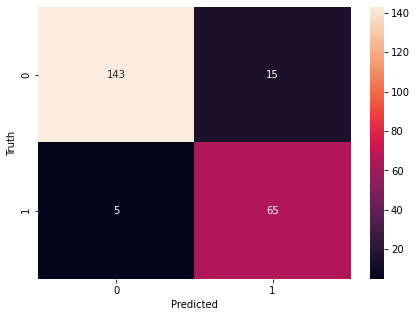

In [28]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
#Test report on the main classification metrics
from sklearn.metrics import classification_report as cr

In [31]:
ML_repo= cr(Y_test,Y_pred)
print(ML_repo)

              precision    recall  f1-score   support

           B       0.91      0.97      0.93       148
           M       0.93      0.81      0.87        80

    accuracy                           0.91       228
   macro avg       0.92      0.89      0.90       228
weighted avg       0.91      0.91      0.91       228

